# Initial Setup

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

np.random.seed(42)
torch.manual_seed(42)


## Activation Functions


In [24]:
def sigmoid(z):
  """
  Sigmoid activation function: σ(z) = 1 / (1 + e^(-z))
  Maps any real value to the range (0,1)
  """

  return 1/(1+np.exp(-z))

def relu(z):
  """
  Rectified Linear Unit: ReLU(z) = max(0, z)
  Returns z if positive, 0 otherwise
  """
  return(np.maximum(z,0))


def tanh(z):
  """
  Hyperbolic tangent activation: tanh(z) = (e^z - e^(-z)) / (e^z + e^(-z))
  Maps any real value to the range (-1,1)
  """

  return ((np.exp(z) - np.exp(-z))/(np.exp(z)+np.exp(-z)))



print(round(tanh(5),15) == round(np.tanh(5),15))
print(round(tanh(5),16) == round(np.tanh(5),16)) ## np.tanh has more floating points


True
False


### Visualization

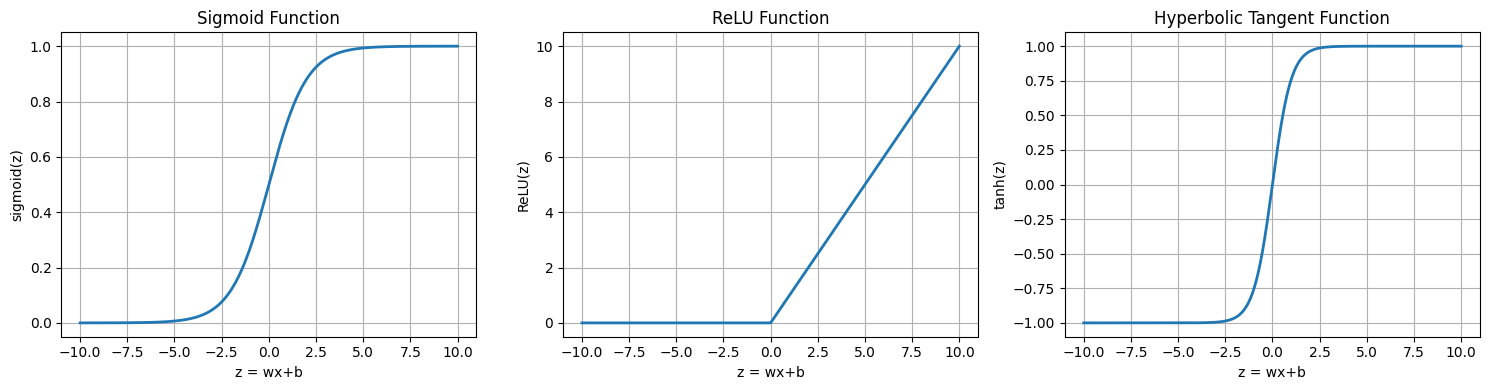

In [40]:
z = np.linspace(-10, 10, 1000)

plt.figure(figsize=(15,4))

# Sigmoid
plt.subplot(1,3,1) # *nrows*, *ncols*, *index: 1 row, 3 cols, position 1
plt.plot(z,sigmoid(z),linewidth=2)
plt.grid(True)
plt.xlabel("z = wx+b")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid Function")

# ReLU
plt.subplot(1,3,2)
plt.plot(z, relu(z), linewidth=2)
plt.grid(True)
plt.xlabel("z = wx+b")
plt.ylabel("ReLU(z)")
plt.title("ReLU Function")

# Hypebolic Tangent
plt.subplot(1,3,3)
plt.plot(z, tanh(z), linewidth=2)
plt.grid(True)
plt.xlabel("z = wx+b")
plt.ylabel("tanh(z)")
plt.title("Hyperbolic Tangent Function")

plt.tight_layout() # Adjust the padding between and around subplots


plt.show()

## Derivatives of Activation Functions

In [41]:
def sigmoid_derivative(z):
  """Derivative of sigmoid: σ'(z) = σ(z)(1-σ(z))"""
  s = sigmoid(z)

  return(s * (1-s))

def tanh_derivative(z):
  """Derivative of tanh: tanh'(z) = 1 - tanh²(z)"""

  return(1 - np.tanh(z)**2)

def relu_derivative(z):
  """Derivative of ReLU: 1 if z > 0, 0 otherwise"""

  return(z > 0).astype(float)


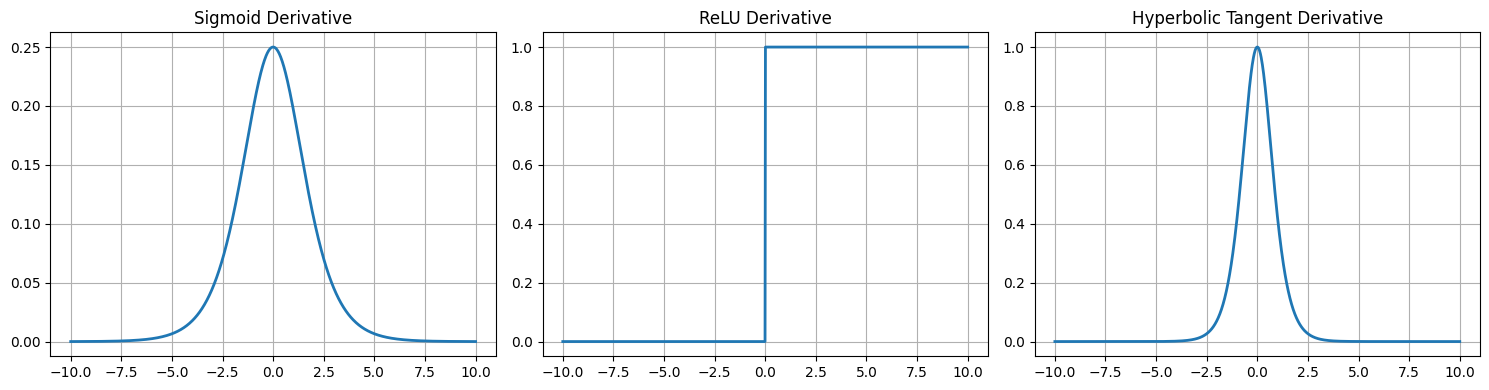

In [49]:
plt.figure(figsize=(15,4)) # 5 each graph

# Sigmoid derivative
plt.subplot(1,3,1) # *nrows*, *ncols*, *index: 1 row, 3 cols, position 1
plt.plot(z, sigmoid_derivative(z), linewidth=2)
plt.title("Sigmoid Derivative")
plt.grid(True)


# ReLU derivative
plt.subplot(1,3,2)
plt.plot(z, relu_derivative(z), linewidth=2)
plt.title("ReLU Derivative")
plt.grid(True)


# tanh derivative
plt.subplot(1,3,3)
plt.plot(z, tanh_derivative(z), linewidth=2)
plt.title("Hyperbolic Tangent Derivative")
plt.grid(True)

plt.tight_layout()
plt.show()


#Neural Unit

In [91]:
class NeuralUnit:
  """
  Single Neural Unit that computes: y = activation(w.x + b)
  """

  def __init__(self, n_inputs, activation='sigmoid'):
    self.weights = np.random.randn(n_inputs) * 0.1 # Must not be zero, if not weights learn nothing. Diff from LogReg
    self.bias = 0.0

    # set activation function
    self.activation_name = activation

    if activation == 'sigmoid':
      self.activation = sigmoid
      self.activation_derivative = sigmoid_derivative

    elif activation == 'tanh':
      self.activation = tanh
      self.activation_derivative = tanh_derivative

    elif activation == 'relu':
      self.activation = relu
      self.activation_derivative = relu_derivative


  def forward(self, x):
    """Forward pass: compute output given input x"""

    # Linear combination: z = w·x + b
    self.z = np.dot(x, self.weights) + self.bias

    # Activation function
    self.output = self.activation(self.z)

    return(self.output)


  def __repr__(self):
    return f"NeuralUnit(weights={self.weights}, bias={self.bias:.3f}, activation={self.activation_name})"


In [92]:
neural_unit = NeuralUnit(n_inputs=10, activation = 'sigmoid')

x = np.random.randn(10)

z = neural_unit.forward(x)

print(f"Input: {x}")
print(f"Weights: {neural_unit.weights}")
print(f"Bias: {neural_unit.bias}")
print(f"z = w·x + b = {neural_unit.z:.3f}")
print(f"Input shape: {x.shape}")
print(f"Output: {z}")


Input: [ 0.54709738 -0.20219265 -0.2176812   1.09877685  0.82541635  0.81350964
  1.30547881  0.02100384  0.68195297 -0.31026676]
Weights: [ 0.08128621  0.06296288 -0.0828995  -0.0560181   0.07472936  0.06103703
 -0.00209016  0.01173274  0.12776649 -0.05915714]
Bias: 0.0
z = w·x + b = 0.203
Input shape: (10,)
Output: 0.5504713094556452
